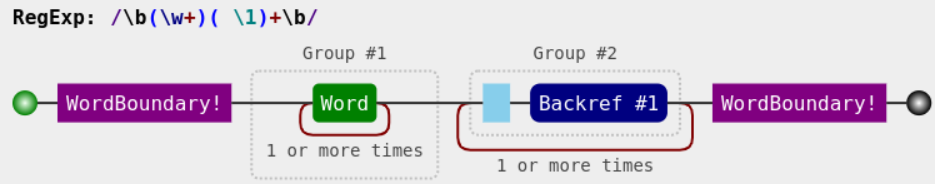

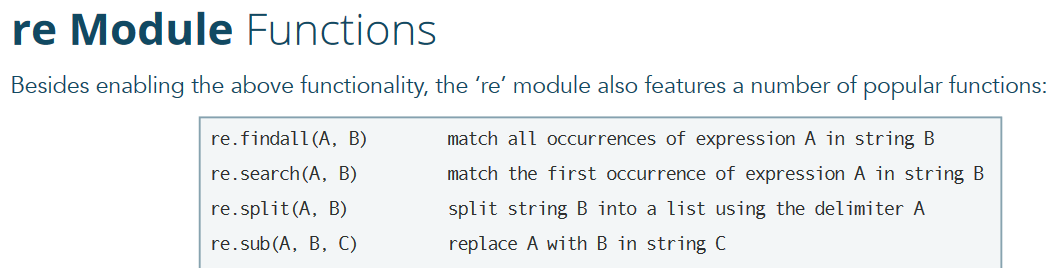

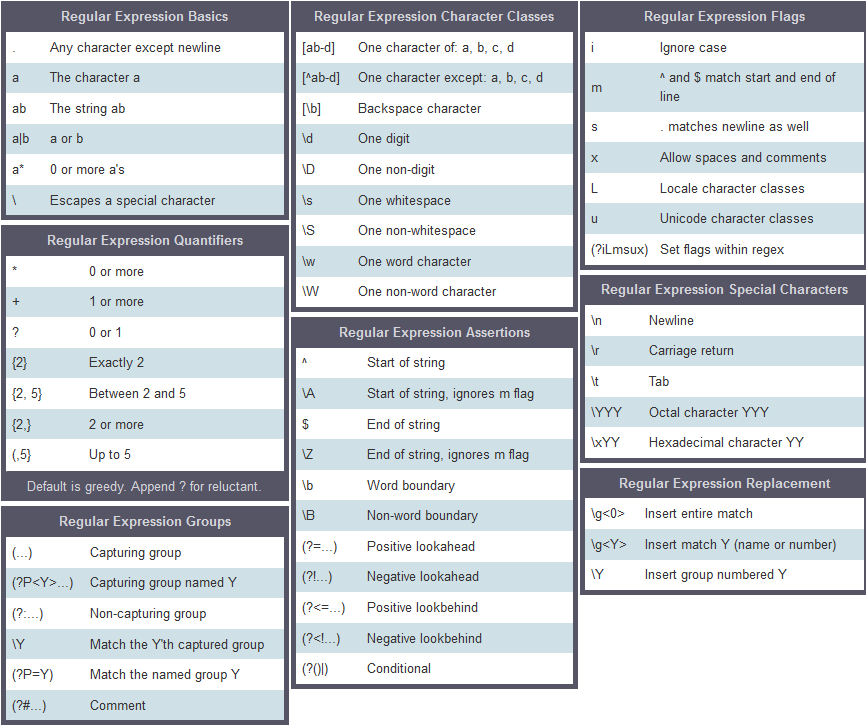

In [3]:
import pandas as pd
hn = pd.read_csv("hacker_news.csv")
hn.columns

Index(['id', 'title', 'url', 'num_points', 'num_comments', 'author',
       'created_at'],
      dtype='object')

In [29]:
import re

titles = hn["title"].tolist()

python_mentions = 0
pattern = "[pP]ython"
for title in titles:
    if re.search(pattern, title):
        python_mentions += 1
python_mentions

160

In [94]:
titles = hn["title"]
python_mentions = titles.str.contains(pattern).sum()
python_mentions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


444

In [11]:
ruby_titles = titles[titles.str.contains("[Rr]uby")]
ruby_titles.head()

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object

In [14]:
email_bool = titles.str.contains("e-?mail")
email_titles = titles[email_bool]
email_count = email_bool.sum()
email_count

86

In [36]:
pattern = "\[\w+\]" # 
tag_titles = titles[titles.str.contains(pattern)]
tag_count = titles.str.contains(pattern).sum()
tag_count

444

In [117]:
titles = hn["title"]
pattern = r"\[(\w+)\]"
tag_freq = titles.str.extract(pattern, expand=False).value_counts()
tag_freq.head()

pdf      276
video    111
audio      3
2015       3
2014       2
Name: title, dtype: int64

In [89]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

pattern = "[Jj]ava[^Ss]"
java_titles = titles[titles.str.contains(pattern)]
first_10_matches(pattern)

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
2910                2016 JavaOne Intel Keynote  32mn Talk
3452    What are the Differences Between Java Platform...
Name: title, dtype: object

In [92]:
pattern = r"\b[jJ]ava\b"
java_titles = titles[titles.str.contains(pattern)]
first_10_matches(pattern)

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and p...
2493    Ask HN: I've been a java dev for a couple of y...
2751                Eventsourcing for Java 0.4.0 released
3228                              Comparing Rust and Java
3452    What are the Differences Between Java Platform...
Name: title, dtype: object

In [103]:
pattern_beginning = r"^\[\w+\]"
beginning_count = titles.str.contains(pattern_beginning).sum()
pattern_ending = r"\[\w+\]$"
ending_count = titles.str.contains(pattern_ending).sum()
print(beginning_count.sum())
print(ending_count.sum())

15
417


In [104]:
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL'])
pattern = r"e[\-\s]?mail"
email_mentions = titles.str.contains(pattern, flags=re.I).sum()
email_mentions

151

In [106]:
pattern = r"SQL"
sql_counts = titles.str.contains(pattern, flags=re.I).sum()
sql_counts

108

In [121]:
pattern = r"(\w+SQL)"
sql_flavors = titles.str.extract(pattern, expand=False, flags=re.I)
sql_flavors_freq = sql_flavors.value_counts()
print(sql_flavors_freq)

PostgreSQL    27
NoSQL         16
MySQL         12
nosql          1
MemSQL         1
mySql          1
CloudSQL       1
SparkSQL       1
Name: title, dtype: int64


In [174]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql["flavor"] = hn_sql["title"].str.extract(r"(\w+SQL)", flags=re.I)
flavors_freq = hn_sql["flavor"].str.lower().value_counts()
flavors_freq.head()

postgresql    27
nosql         17
mysql         13
cloudsql       1
memsql         1
Name: flavor, dtype: int64

In [165]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql["flavor"] = hn_sql["title"].str.extract(r"(\w+SQL)", flags=re.I)
hn_sql["flavor"] = hn_sql["flavor"].str.lower()
sql_pivot = pd.pivot_table(hn_sql, index="flavor", values = "num_comments", aggfunc='mean')
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [172]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql["flavor"] = hn_sql["title"].str.extract(r"(\w+SQL)", flags=re.I)
hn_sql["flavor"] = hn_sql["flavor"].str.lower()
hn_sql["flavor"].head()

142     postgresql
221         memsql
882     postgresql
1160         nosql
1197    postgresql
Name: flavor, dtype: object

In [156]:
pattern = r"[Pp]ython ([\d\.]+)"
py_ver = titles.str.extract(pattern, expand=False)
py_ver_freq = dict(py_ver.value_counts())
py_ver_freq

{'3': 10,
 '2': 3,
 '3.5': 3,
 '3.6': 2,
 '1.5': 1,
 '8': 1,
 '2.7': 1,
 '4': 1,
 '3.5.0': 1}

In [158]:
pattern = r"\b[Cc]\b[^\.\+]"
first_ten = first_10_matches(pattern)
first_ten

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object

In [202]:
pattern = r"(?<!Series\s)\b[Cc]\b(?![\+\.])"
c_mentions = titles.str.contains(pattern).sum()
c_mentions

102

In [234]:
# match cases of repeated words
pattern = r"\b(\w+)\s\1\b"
repeated_words = titles[titles.str.contains(pattern)]
repeated_words

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object

In [216]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])
pattern = r"e[\-\s]?mail"
email_uniform = email_variations.str.replace(pattern, "email", flags=re.I)
titles_clean = titles.str.replace(pattern, "email", flags=re.I)
a = titles_clean.str.contains(r"e[\-\s]?mail")
titles[a].head()

119    Show HN: Send an email from your shell to your...
161    Computer Specialist Who Deleted Clinton Emails...
174                                      Email Apps Suck
261    Emails Show Unqualified Clinton Foundation Don...
313        Disposable emails for safe spam free shopping
Name: title, dtype: object

In [221]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param'
])
pattern = r"https?://([\w\.]+)"
test_urls_clean = test_urls.str.extract(pattern, expand=False, flags=re.I)
domains = hn['url'].str.extract(pattern, expand=False, flags=re.I)
top_domains = domains.value_counts().head(20)
top_domains

github.com                1008
medium.com                 825
www.nytimes.com            525
www.theguardian.com        248
techcrunch.com             245
www.youtube.com            213
www.bloomberg.com          193
arstechnica.com            191
www.washingtonpost.com     190
www.wsj.com                138
www.theatlantic.com        137
www.bbc.com                134
www.wired.com              114
www.theverge.com           112
www.bbc.co.uk              108
en.wikipedia.org           100
twitter.com                 93
qz.com                      85
motherboard.vice.com        82
www.newyorker.com           81
Name: url, dtype: int64

In [223]:
pattern = r"(.+)://([\w\.]+)/?(.*)"
test_url_parts = test_urls.str.extract(pattern)
url_parts = hn["url"].str.extract(pattern)
url_parts.head()

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


In [226]:
pattern = r"(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)"
url_parts = hn["url"].str.extract(pattern)
url_parts.head()

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


In [4]:
strings = ["bat", "robotics", "megabyte"]
regex = "b.t"

In [ ]:
strings = ["better not put too much", "butter in the", "batter"]
bad_string = "We also wouldn't want it to be bitter"
regex = "^b.tter"

In [ ]:
import re
of_reddit_count = 0
for item in posts:
    if re.search('of Reddit', item[0]) is not None:
        of_reddit_count += 1

In [ ]:
import re
of_reddit_count = 0
for row in posts:
    if re.search("of [rR]eddit", row[0]) is not None:
        of_reddit_count += 1

In [ ]:
import re
serious_count = 0
for row in posts:
    if re.search("\[[Ss]erious\]", row[0]) is not None:
        serious_count += 1

In [ ]:
import re
serious_count = 0
for row in posts:
    if re.search("[[\[\(][Ss]erious[\]\)]", row[0]) is not None:
        serious_count += 1

In [ ]:
import re
serious_start_count = 0
serious_end_count = 0
serious_count_final = 0
for item in posts:
    if re.search("^[\[\(][Ss]erious[\]\)]", item[0]) is not None:
        serious_start_count +=1
    if re.search("[\[\(][Ss]erious[\]\)]$", item[0]) is not None:
        serious_end_count +=1
    if re.search("^[\[\(][Ss]erious[\]\)]|[\[\(][Ss]erious[\]\)]$", item[0]) is not None:

In [ ]:
re.sub("yo", "hello", "yo world")

In [ ]:
import re  #Replace "[serious]", "(Serious)", and "(serious)" with "[Serious]" for all of the titles in posts
for item in posts:
    item[0]=re.sub("[\[\(][Ss]erious[\]\)]", "[Serious]", item[0])

In [ ]:
import re
year_strings = []
for item in strings:
    if re.search('[1-2][0-9][0-9][0-9]', item) is not None:
        year_strings.append(item)

In [ ]:
import re
year_strings = []
for item in strings:
    if re.search('[1-2][0-9]{3}', item) is not None:
        year_strings.append(item)

In [ ]:
import re
years=re.findall('[1-2][0-9]{3}', years_string)